In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
dataset=pd.read_csv(r'train.csv', na_values=['?'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
Column1     779 non-null int64
Column2     779 non-null int64
Column3     779 non-null int64
Column4     732 non-null float64
Column5     755 non-null float64
Column6     701 non-null float64
Column7     777 non-null float64
Column8     735 non-null float64
Column9     735 non-null float64
Column10    730 non-null float64
Column11    517 non-null float64
Column12    265 non-null float64
Column13    371 non-null float64
Column14    779 non-null int64
dtypes: float64(10), int64(4)
memory usage: 85.3 KB


## Exploratory Data Analysis

In [43]:
dataset.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [44]:
dataset.tail()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
774,62,0,4,140.0,268.0,0.0,2.0,160.0,0.0,36.0,3.0,2.0,3.0,3
775,62,1,2,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
776,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,14.0,1.0,1.0,3.0,0
777,60,1,4,NaN,195.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
778,55,1,3,NaN,245.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [45]:
dataset.isnull().values.any()

True

In [46]:
dataset=dataset.dropna(axis = 0, how ='any') 

In [47]:
dataset.isnull().values.any()

False

In [48]:
dataset.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
5,64,0,4,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
9,54,1,3,120.0,258.0,0.0,2.0,147.0,0.0,4.0,2.0,0.0,7.0,0
11,49,1,3,118.0,149.0,0.0,2.0,126.0,0.0,8.0,1.0,3.0,3.0,1
13,55,0,2,132.0,342.0,0.0,0.0,166.0,0.0,12.0,1.0,0.0,3.0,0


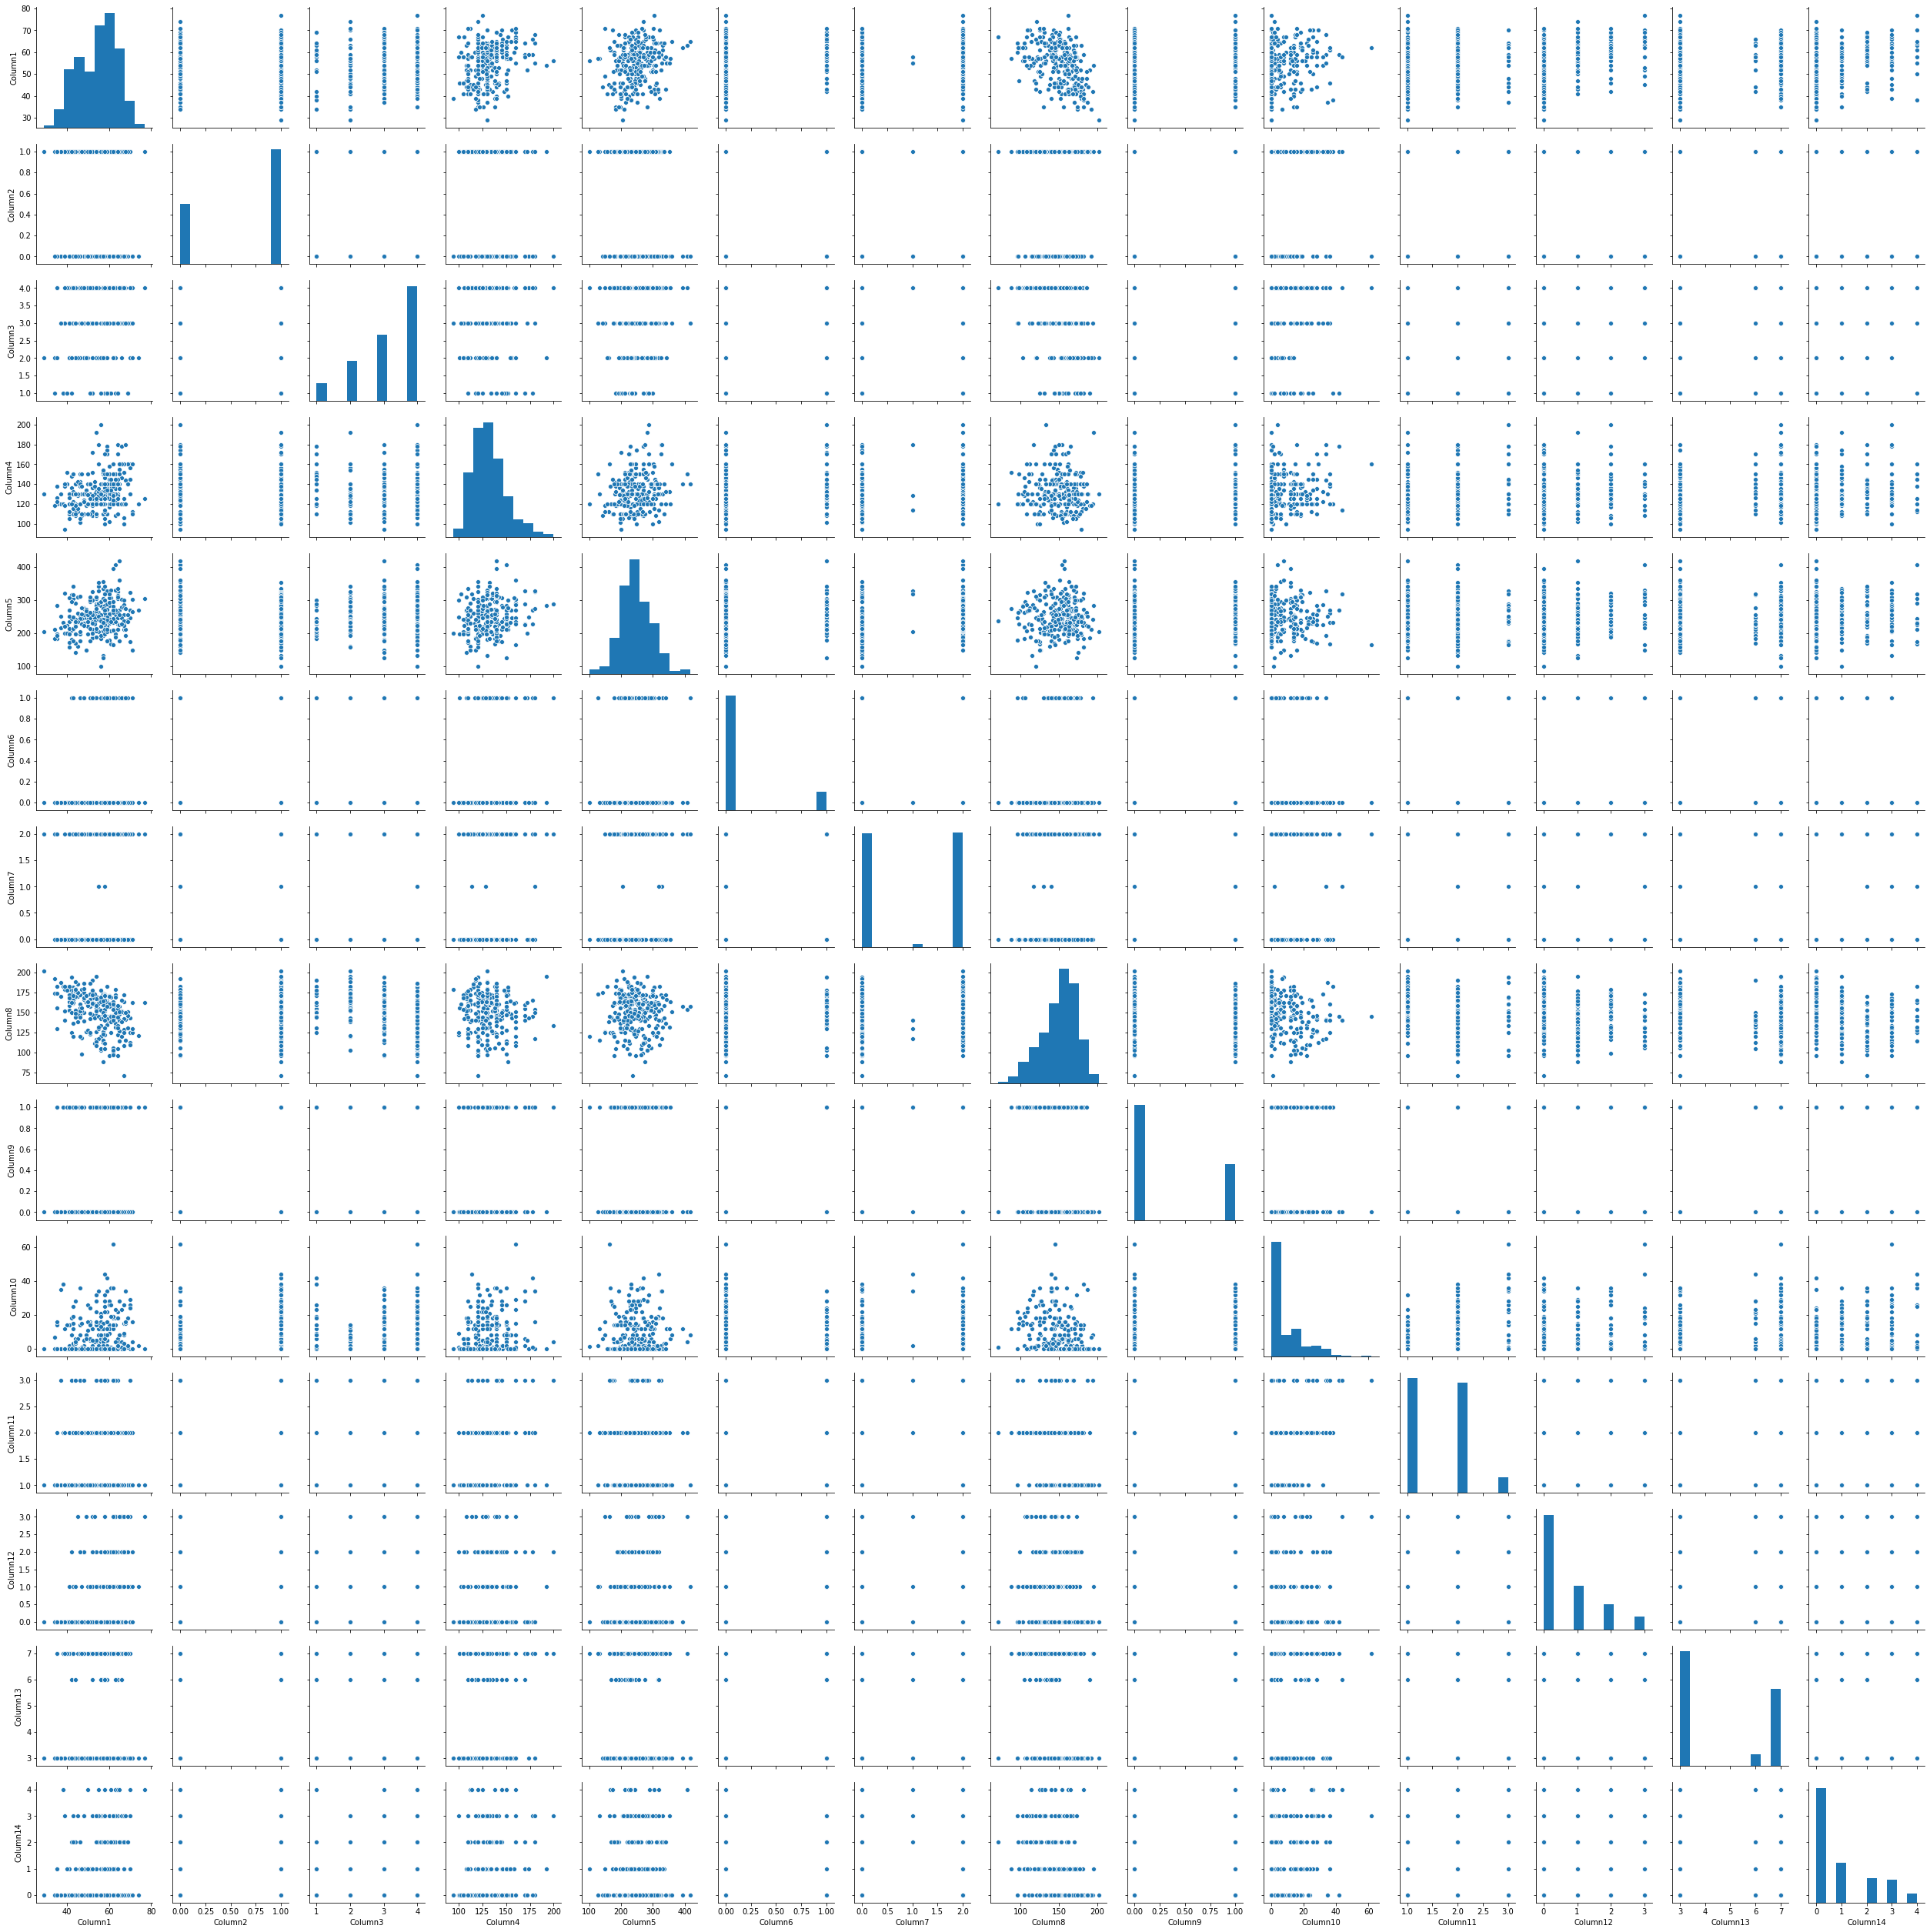

In [49]:
import seaborn as sns
sns.pairplot(dataset)

## Using Naive Bayes Classifier to process the Data

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [51]:
X = dataset[['Column3', 'Column9', 'Column11', 'Column12', 'Column13']]
Y = dataset['Column14']

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [60]:
model=GaussianNB()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.00      0.00      0.00         9
           2       0.50      0.10      0.17        10
           3       0.00      0.00      0.00         7
           4       0.09      0.60      0.16         5

    accuracy                           0.51        77
   macro avg       0.30      0.29      0.23        77
weighted avg       0.62      0.51      0.53        77



In [62]:
from sklearn.metrics import accuracy_score
print("The Model Accuracy is %r" %(accuracy_score(Y_test,Y_pred)))

The Model Accuracy is 0.5064935064935064
